In [1]:
from sde import * 
import collections
import datetime
import time

In [2]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [3]:
%%notify
import time
time.sleep(10)
print('Finished!')

%autonotify -a 30

Finished!


<IPython.core.display.Javascript object>

1. randomly generate x graphs, get average node centrality
2. compare similarity against average centrality

# Experiment Setup

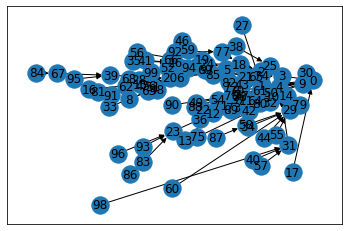

In [4]:
dg = nx.gn_graph(100)
for e in dg.edges():
    dg[e[0]][e[1]]['weight'] = random.uniform(0,1)

nx.draw_networkx(dg)

In [ ]:
node_pairs = list(it.combinations(list(dg.nodes()), 2))
sample_10_jaccard = []
for pair in node_pairs:
    sample_10_jaccard.append(calculate_jaccard_similarity(dg, pair[0], pair[1]))
print(sample_10_jaccard)

In [ ]:
sample_10_immSim, sample_10_fullSim = [], []
for pair in node_pairs:
    sample_10_immSim.append(get_immediate_similarity(dg, pair[0], pair[1]))
    sample_10_fullSim.append(get_full_similarity(dg, pair[0], pair[1]))
print(sample_10_immSim, sample_10_fullSim)

In [7]:
def highestCentrality(dg):
    centDict = nx.degree_centrality(dg)
    centList = list(centDict.values())
    highestCent = max(centList)
    return highestCent

In [8]:
highestCentrality(dg)

0.13131313131313133

In [9]:
dict(dg.degree(list(dg.nodes())))

{0: 13,
 1: 9,
 2: 4,
 3: 2,
 4: 10,
 5: 6,
 6: 9,
 7: 6,
 8: 1,
 9: 1,
 10: 3,
 11: 2,
 12: 3,
 13: 1,
 14: 3,
 15: 2,
 16: 1,
 17: 1,
 18: 3,
 19: 3,
 20: 5,
 21: 1,
 22: 1,
 23: 4,
 24: 6,
 25: 2,
 26: 3,
 27: 1,
 28: 1,
 29: 6,
 30: 1,
 31: 4,
 32: 2,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 3,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 2,
 46: 1,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 1,
 52: 1,
 53: 2,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 2,
 59: 1,
 60: 1,
 61: 1,
 62: 2,
 63: 1,
 64: 1,
 65: 2,
 66: 1,
 67: 2,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 1,
 76: 1,
 77: 2,
 78: 2,
 79: 1,
 80: 1,
 81: 1,
 82: 1,
 83: 2,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 94: 1,
 95: 1,
 96: 1,
 97: 1,
 98: 1,
 99: 1}

In [10]:
deg_dict = dict(dg.degree(list(dg.nodes())))
highest_degree = max(list(deg_dict.values()))
print(deg_dict)
print(highest_degree)

{0: 13, 1: 9, 2: 4, 3: 2, 4: 10, 5: 6, 6: 9, 7: 6, 8: 1, 9: 1, 10: 3, 11: 2, 12: 3, 13: 1, 14: 3, 15: 2, 16: 1, 17: 1, 18: 3, 19: 3, 20: 5, 21: 1, 22: 1, 23: 4, 24: 6, 25: 2, 26: 3, 27: 1, 28: 1, 29: 6, 30: 1, 31: 4, 32: 2, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 3, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 2, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 2, 54: 1, 55: 1, 56: 1, 57: 1, 58: 2, 59: 1, 60: 1, 61: 1, 62: 2, 63: 1, 64: 1, 65: 2, 66: 1, 67: 2, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 2, 78: 2, 79: 1, 80: 1, 81: 1, 82: 1, 83: 2, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1}
13


In [ ]:
jindex, immSim, fullSim = [], [], []
dictsJI, dictsIS, dictsFS = [], [], []
for pair in node_pairs:
    jindex.append(calculate_jaccard_similarity(dg, pair[0], pair[1]))
    immSim.append(get_immediate_similarity(dg, pair[0], pair[1]))
    fullSim.append(get_full_similarity(dg, pair[0], pair[1]))
                
dictsJI.append({highest_degree : jindex})
dictsIS.append({highest_degree : immSim})
dictsFS.append({highest_degree : fullSim})

print(dictsJI, dictsIS, dictsFS)

In [12]:
df = pd.DataFrame(dictsJI)
df

,13
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Experiment

In [13]:
from collections import defaultdict

d1 = {1: 2, 3: 4}
d2 = {1: 6, 3: 7}

dd = defaultdict(list)

for d in (d1, d2): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dict(dd))

{1: [2, 6], 3: [4, 7]}


In [14]:
import time
start = time.time()
print(dict(dd))
end = time.time()
print(end-start)

{1: [2, 6], 3: [4, 7]}
0.0


In [15]:
# source: https://www.geeksforgeeks.org/python-program-to-convert-seconds-into-hours-minutes-and-seconds/
def convert(seconds): 
    return time.strftime("%H:%M:%S", time.gmtime(n)) 

# source: https://www.geeksforgeeks.org/python-merging-two-dictionaries/
def Merge(dict1, dict2): 
    return(dict2.update(dict1))

In [16]:
node_num = [50, 100, 500, 1000]
maxCent, avgMax = {}, {}
ddJI, ddIS, ddFS = defaultdict(list), defaultdict(list), defaultdict(list)
avgSecECT = {}
max_degs = {}

for n in node_num:
    highest_degs = []
    dictsJI, dictsIS, dictsFS = [], [], []
    elapsed_time = []
    for i in range(15):
        starttime = time.time() #mark start time
        
        #create digraph, add edge weights
        dg = nx.gn_graph(n)
        for e in dg.edges():
            dg[e[0]][e[1]]['weight'] = random.uniform(0,1)
        
        #high_cent = highestCentrality(dg)
        #highest_cents.append(high_cent)
        deg_dict = dict(dg.degree(list(dg.nodes())))
        highest_degree = max(list(deg_dict.values()))
        highest_degs.append(highest_degree)

        #get similarity
        node_pairs = list(it.combinations(list(dg.nodes), 2)) #get all possible pairs of nodes in the graph
        jindex, immSim, fullSim = [], [], []
        for pair in node_pairs:
            jindex.append(calculate_jaccard_similarity(dg, pair[0], pair[1]))
            immSim.append(get_immediate_similarity(dg, pair[0], pair[1]))
            fullSim.append(get_full_similarity(dg, pair[0], pair[1]))
                
        dictsJI.append({highest_degree : jindex})
        dictsIS.append({highest_degree : immSim})
        dictsFS.append({highest_degree : fullSim})
        
        endtime = time.time() #mark end time
        elapsed_time.append(endtime-starttime) #calculate elapsed time
        
    #merge similarity dictionaries based on key (highest degree value)
    for d in tuple(dictsJI): #Jaccard dicts
        for key, value in d.items():
            ddJI[key] = value
    for d in tuple(dictsIS): # imm sim dicts
        for key, value in d.items():
            ddIS[key] = value
    for d in tuple(dictsFS): #full sim dicts
        for key, value in d.items():
            ddFS[key] = value
    
    #record run time
    avgECT_seconds = mean(elapsed_time)
    avgSecECT[n] = convert(avgECT_seconds) 
    
    # record highest degs for graph size n
    max_degs[n] = highest_degs

<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x20b310bccc8>,
 <a list of 4 Text xticklabel objects>)

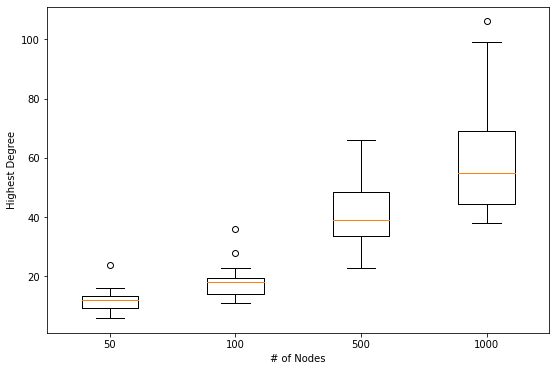

In [17]:
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

degs = collections.OrderedDict(sorted(max_degs.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(max_degs.values()))

ax2.set_xlabel('# of Nodes')
ax2.set_ylabel('Highest Degree')
plt.xticks([x for x in range(1, len(list(max_degs.keys())) + 1)], list(max_degs.keys()))

([<matplotlib.axis.XTick at 0x20b0a7ea8c8>,
 <a list of 41 Text xticklabel objects>)

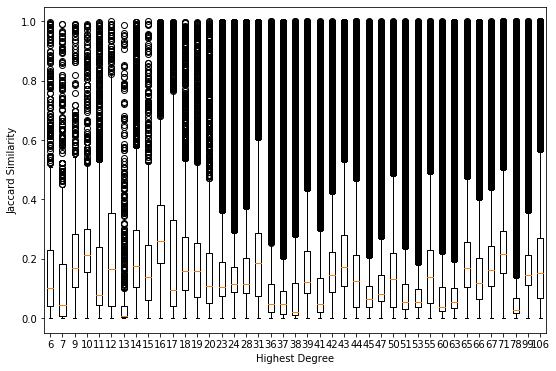

In [18]:
# box plot to compare jaccard similarity against average node centrality
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

jaccards = collections.OrderedDict(sorted(ddJI.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(jaccards.values()))

ax2.set_xlabel('Highest Degree')
ax2.set_ylabel('Jaccard Similarity')
plt.xticks([x for x in range(1, len(list(jaccards.keys())) + 1)], list(jaccards.keys()))

([<matplotlib.axis.XTick at 0x20b0ac602c8>,
 <a list of 41 Text xticklabel objects>)

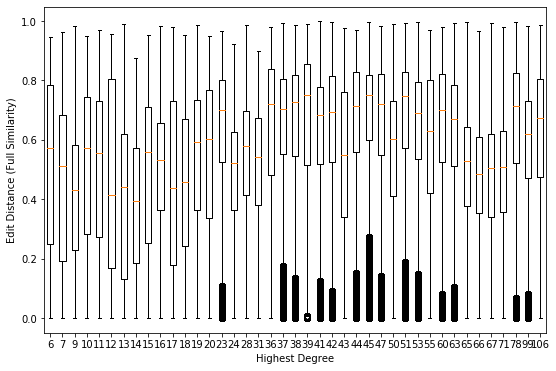

In [19]:
# box plot to compare full sim vals against average node centrality
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

full_sims = collections.OrderedDict(sorted(ddFS.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(full_sims.values()))

ax2.set_xlabel('Highest Degree')
ax2.set_ylabel('Edit Distance (Full Similarity)')
plt.xticks([x for x in range(1, len(list(full_sims.keys())) + 1)], list(full_sims.keys()))

([<matplotlib.axis.XTick at 0x20b0bcd14c8>,
 <a list of 41 Text xticklabel objects>)

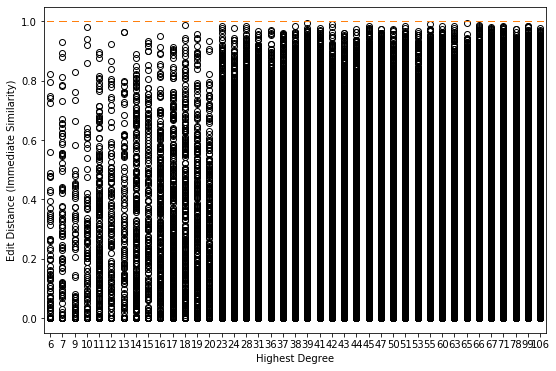

In [20]:
# box plot to compare imm sim vals against average node degree
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

imm_sims = collections.OrderedDict(sorted(ddIS.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(imm_sims.values()))

ax2.set_xlabel('Highest Degree')
ax2.set_ylabel('Edit Distance (Immediate Similarity)')
plt.xticks([x for x in range(1, len(list(imm_sims.keys())) + 1)], list(imm_sims.keys()))

In [21]:
dfECT = pd.DataFrame.from_dict(avgSecECT,orient = 'index', columns=['Avg Runtime'])
dfECT.index.name = '# of nodes'
dfECT

,Avg Runtime
# of nodes,
50,00:00:50
100,00:01:40
500,00:08:20
1000,00:16:40
